<h1 align='center'>  <font size = '6' color='red'> Assignment 4 (Questions) EDA Analysis (Part 2) of Crimes in Boston Dataset<font> </h1>


    
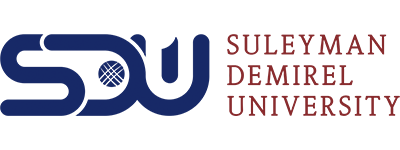

<br>

 
    
  <center align="left">    <center align="left"><center align="left"> <font color='dark blue'><font style= 'bold' size='3' color='dark'>  Instructor: Dr. Khaled Mohamad <font> </center>

#### BOSTON CRIME DATA includes 17 features that are:

- INCIDENT_NUMBER: It is a unique number given each case. 
- OFFENSE_CODE: It shows type of crime.
- OFFENSE_CODE_GROUP: The general name of each crime type.
- OFFENSE_DESCRIPTION: Explanation of specific crime. 
- DISTRICT: Code of zone that crime happened. 
- REPORTING_AREA: Area number that crime reported.
- SHOOTING: If the crime included shooting, it shows with 'Y'.
- YEAR: 2016,2017,2018, 2019, 2020
- MONTH: the month that crime happened.
- DAY OF WEEK: the week that crime happened.
- HOUR: the hour that crime happened.
- UCR_PART: Uniform Crime Reporting Offence types that is defined by The Federal Bureau of Investigation for reporting data

In [182]:
#1 - import the required libraries (0.5)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [183]:
#2 - Read the file Boston_crime.csv. If you found an error use the argument encoding = 'latin-1' (0.5)

df = pd.read_csv('Boston_crime.csv', encoding='latin-1')

## Variable Identifications 

In [184]:
#3- Show your tabulated data

df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2020,4,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2020,4,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2020,4,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2020,4,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2020,4,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2018,4,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2016,4,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2016,4,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2018,4,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [185]:
#4- Five number summary 

df['REPORTING_AREA'] = pd.to_numeric(df['REPORTING_AREA'], errors='coerce')

df = df.dropna(subset=['REPORTING_AREA'])

data = df['REPORTING_AREA']

min_val = np.min(data)
q1_val = np.percentile(data, 25)
med_val = np.median(data)
q3_val = np.percentile(data, 75)
max_val = np.max(data)

print("Minimum:", min_val)
print("First Quartile (Q1):", q1_val)
print("Median (Q2):", med_val)
print("Third Quartile (Q3):", q3_val)
print("Maximum:", max_val)

Minimum: 0.0
First Quartile (Q1): 177.0
Median (Q2): 344.0
Third Quartile (Q3): 544.0
Maximum: 962.0


In [186]:
#5 - What are the dataset features types (dtypes) (1)

feat_types = df.dtypes

print(feat_types)

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA         float64
SHOOTING                object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object


In [187]:
#6 - Convert the type of data in 'DAY_OF_WEEK' and 'OFFENSE_CODE_GROUP' into catrgory type (2)
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype('category')
df['OFFENSE_CODE_GROUP'] = df['OFFENSE_CODE_GROUP'].astype('category')


/var/folders/8b/bz6mhfz974x5g897q47nh_3r0000gn/T/ipykernel_1752/3429665374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype('category')
/var/folders/8b/bz6mhfz974x5g897q47nh_3r0000gn/T/ipykernel_1752/3429665374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFENSE_CODE_GROUP'] = df['OFFENSE_CODE_GROUP'].astype('category')


In [188]:
#Check again the dataset features types
df.dtypes

INCIDENT_NUMBER          object
OFFENSE_CODE              int64
OFFENSE_CODE_GROUP     category
OFFENSE_DESCRIPTION      object
DISTRICT                 object
REPORTING_AREA          float64
SHOOTING                 object
YEAR                      int64
MONTH                     int64
DAY_OF_WEEK            category
HOUR                      int64
UCR_PART                 object
STREET                   object
Lat                     float64
Long                    float64
Location                 object
dtype: object

In [189]:
#7- Show value counts of DAY_OF_WEEK and OFFENSE_CODE_GROUP columns (2)

day_of_week_counts = df['DAY_OF_WEEK'].value_counts()
print("Value Counts for DAY_OF_WEEK:")
print(day_of_week_counts)

offense_code_group_counts = df['OFFENSE_CODE_GROUP'].value_counts()
print("\nValue Counts for OFFENSE_CODE_GROUP:")
print(offense_code_group_counts)

Value Counts for DAY_OF_WEEK:
Friday       45445
Wednesday    43779
Thursday     43668
Tuesday      43327
Monday       42799
Saturday     41893
Sunday       37912
Name: DAY_OF_WEEK, dtype: int64

Value Counts for OFFENSE_CODE_GROUP:
Motor Vehicle Accident Response              30558
Larceny                                      25256
Medical Assistance                           22491
Investigate Person                           18063
Other                                        17157
                                             ...  
Manslaughter                                     6
INVESTIGATE PERSON                               4
Biological Threat                                2
Burglary - No Property Taken                     2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64


Let us say you are interested to study the data that is based on the UCR_Types Part One, two and three all together

In [190]:
#8 - Show the unique values in the year column to understand the contents (1)
df2 = df['YEAR'].unique()
df2

array([2020, 2019, 2018, 2016])

In [191]:
#9 - Filter dataset and make it based only on Part One, Part Two, and Part Three (in UCR_PART column) (2)
val_keep = ['Part One', 'Part Two', 'Part Three']

filtered_df = df[df['UCR_PART'].isin(val_keep)]
filtered_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2020,4,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,NaN,2020,4,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,NaN,2020,4,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,NaN,2020,4,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,NaN,2020,4,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,NaN,2018,4,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,NaN,2016,4,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,NaN,2016,4,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,NaN,2018,4,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [192]:
#10- Show the size of the dataset
num_rows, num_columns = df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 298823
Number of Columns: 16


In [193]:
#11- Drope the columns INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_DESCRIPTION, REPORTING_AREA, SHOOTING, STREET, Lat, Long, Location from the dataset
#(2)

columns_to_drop = ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 
                   'SHOOTING', 'STREET', 'Lat', 'Long', 'Location']

df = df.drop(columns=columns_to_drop)

print(df)


#11- Check the above step by showing the dataset


          OFFENSE_CODE_GROUP DISTRICT  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0                    Larceny      D14  2020      4      Sunday    13   
1                  Vandalism      C11  2020      4     Tuesday     0   
2                      Towed       D4  2020      4      Monday    19   
3       Investigate Property       D4  2020      4      Monday    21   
4       Investigate Property       B3  2020      4      Monday    21   
...                      ...      ...   ...    ...         ...   ...   
319068       Warrant Arrests       D4  2018      4      Sunday    17   
319069              Homicide      E18  2016      4    Thursday    13   
319070       Warrant Arrests      E18  2016      4    Thursday    13   
319071       Warrant Arrests      E13  2018      4     Tuesday    19   
319072       Warrant Arrests       D4  2016      4      Monday     0   

          UCR_PART  
0         Part One  
1         Part Two  
2       Part Three  
3       Part Three  
4       Part Three  
...      

## Missing values treatment

In [145]:
#12- Show the number of missing values in each column at once (1)
df.isna().sum()

OFFENSE_CODE_GROUP     0
DISTRICT              30
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART              90
dtype: int64

In [146]:
#13 - Drope the missing value on column DISTRICT (2)
df3 = df.dropna(subset='DISTRICT')
df3

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
0,Larceny,D14,2020,4,Sunday,13,Part One
1,Vandalism,C11,2020,4,Tuesday,0,Part Two
2,Towed,D4,2020,4,Monday,19,Part Three
3,Investigate Property,D4,2020,4,Monday,21,Part Three
4,Investigate Property,B3,2020,4,Monday,21,Part Three
...,...,...,...,...,...,...,...
319068,Warrant Arrests,D4,2018,4,Sunday,17,Part Three
319069,Homicide,E18,2016,4,Thursday,13,Part One
319070,Warrant Arrests,E18,2016,4,Thursday,13,Part Three
319071,Warrant Arrests,E13,2018,4,Tuesday,19,Part Three


In [147]:
#14- Again, show the missing values again
df4 = df.isna().sum()
df4

OFFENSE_CODE_GROUP     0
DISTRICT              30
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART              90
dtype: int64

## Outliers treatment

- You need to draw a histrogram for the foolwing columns:
  OFFENSE_CODE_GROUP, YEAR, MONTH, DAY_OF_WEEK, HOUR, DISTRICT, and UCR_PART

- Use subplot to plot 7x1 matrix form of the above columns

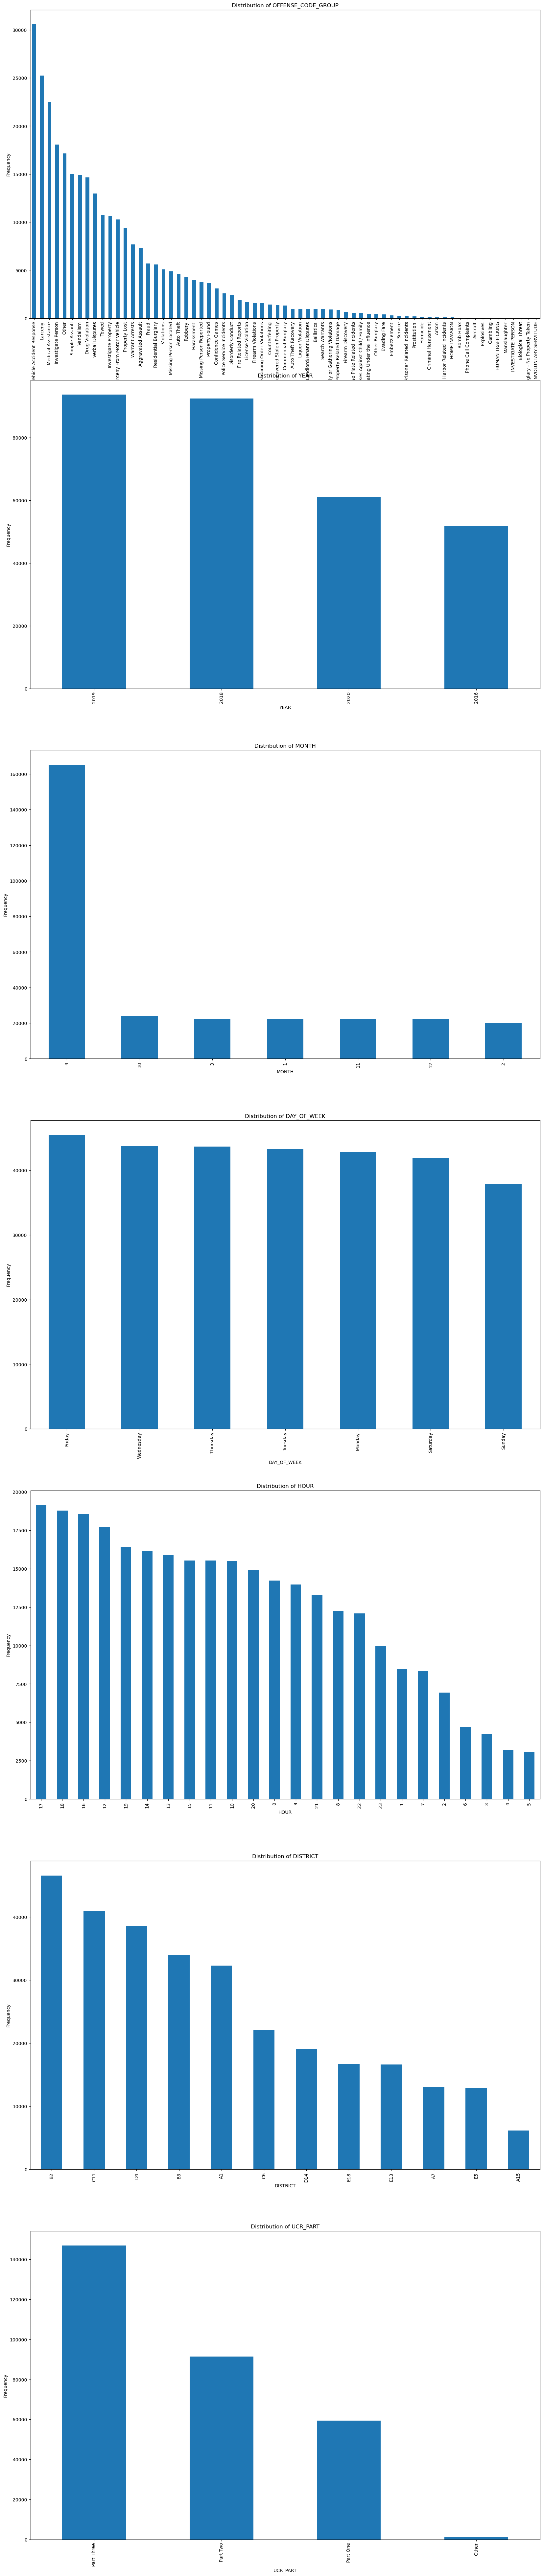

In [148]:
#15- Use subplot to plot 7x1 matrix form of the above columns (7)

columns_plot = ['OFFENSE_CODE_GROUP', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'DISTRICT', 'UCR_PART']

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20, 100))

for i, column in enumerate(columns_plot):
    ax = axes[i]
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()

## In this dataset, you are required to answer the following questions:


### Q1. What is the most common type of crime in Boston?



In [149]:
#All the crimes type in Bostons are in the column OFFENSE_CODE_GROUP.  (2)
#16- Calculate the counts for all crimes 

crime_counts = df['OFFENSE_CODE_GROUP'].value_counts()

print(crime_counts)

Motor Vehicle Accident Response              30558
Larceny                                      25256
Medical Assistance                           22491
Investigate Person                           18063
Other                                        17157
                                             ...  
Manslaughter                                     6
INVESTIGATE PERSON                               4
Biological Threat                                2
Burglary - No Property Taken                     2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64


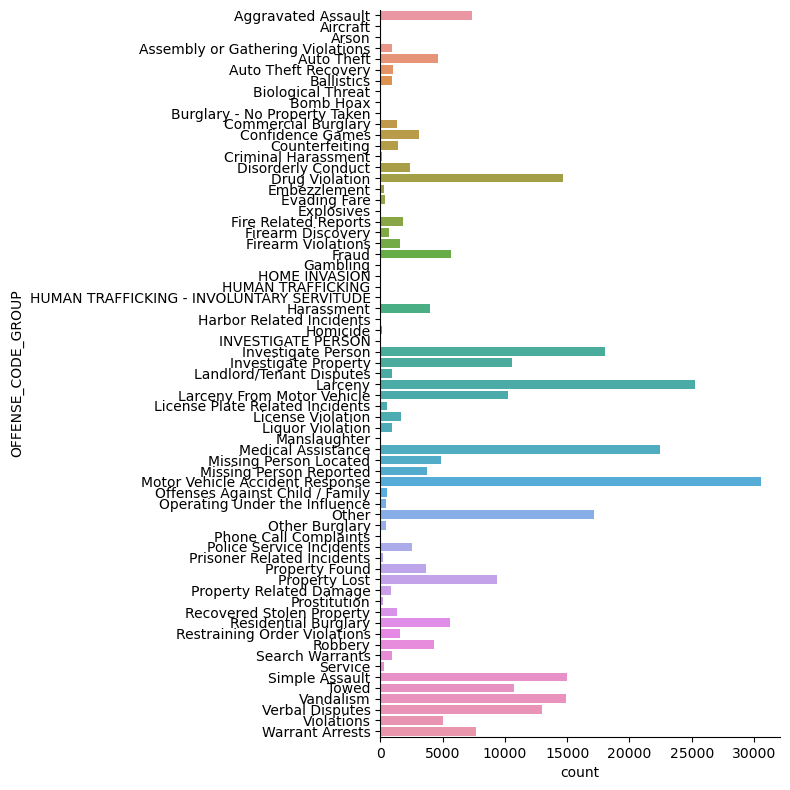

In [150]:
#17- Visualize all the crimes on Boston using catplot. Show the graph in the horizontal axis (2)

sb.catplot(y='OFFENSE_CODE_GROUP', kind='count', height=8, aspect=1.0, data = df)
plt.show()


#### Give a conclusion of your answer in Q1: (1)

### Q2. Which year has the highest rate of crimes?

In [151]:
#18- Calculate the counts of crimes based on year (2)
df5 = df.groupby(df['YEAR']).count()
df5

,OFFENSE_CODE_GROUP,DISTRICT,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
YEAR,,,,,,
2016,51683,51675,51683,51683,51683,51682
2018,92398,92382,92398,92398,92398,92364
2019,93660,93656,93660,93660,93660,93621
2020,61082,61080,61082,61082,61082,61066


In [152]:
#19- Use cat plot to answer Q2 (2)


#### Give a conclusion of your answer in Q2: (1)

### Q3. What is the most common type of Uniform Crime Reporting Offence (UCR Part) in Boston?


In [153]:
#20- Calculate the counts of crimes that is based on UCR part (2)

ucr_counts = df['UCR_PART'].value_counts()
print(ucr_counts)


Part Three    146858
Part Two       91385
Part One       59319
Other           1171
Name: UCR_PART, dtype: int64


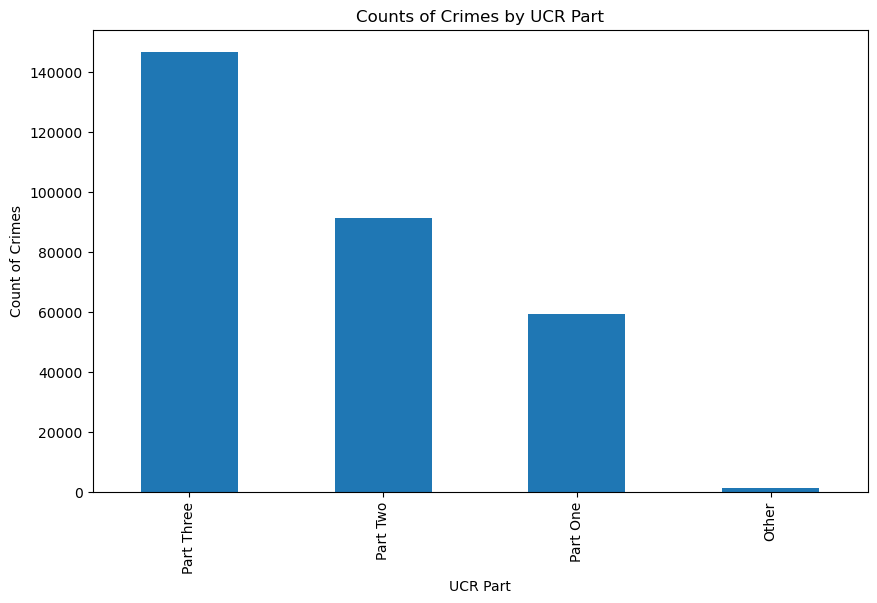

In [154]:
#21- Visualize Q3 (2)

plt.figure(figsize=(10, 6))
ucr_counts.plot(kind='bar')
plt.xlabel('UCR Part')
plt.ylabel('Count of Crimes')
plt.title('Counts of Crimes by UCR Part')
plt.show()

#### Give a conclusion of your answer in Q3: (1)

### Q4. Which district in boston is the most dangerous district and which one is the safest?


#### District Names

To help you understand what is the name of each direct. Let us replace the code of district with its real name. This is has been done for you.

In [155]:
#22- Please, don't touch this code
df.DISTRICT.replace({'A1' : 'Downtown',
'A15': 'Charlestown',
'A7': 'East Boston',
'B2': 'Roxbury',
'B3': 'Mattapan',
'C6': 'South Boston',
'C11': 'Dorchester',
'D4': 'South End',
'D14': 'Brighton',
'E5': 'West Roxbury',
'E13': 'Jamaica Plain',
'E18':'Hyde Park'}, inplace=True)

/var/folders/8b/bz6mhfz974x5g897q47nh_3r0000gn/T/ipykernel_1752/3690835975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DISTRICT.replace({'A1' : 'Downtown',


In [156]:
#23- Calculate the counts of crimes that is based on district (2)

ucr_counts2 = df['DISTRICT'].value_counts()
print(ucr_counts2)

Roxbury          46561
Dorchester       40991
South End        38530
Mattapan         33939
Downtown         32274
South Boston     22050
Brighton         19068
Hyde Park        16701
Jamaica Plain    16617
East Boston      13070
West Roxbury     12835
Charlestown       6157
Name: DISTRICT, dtype: int64


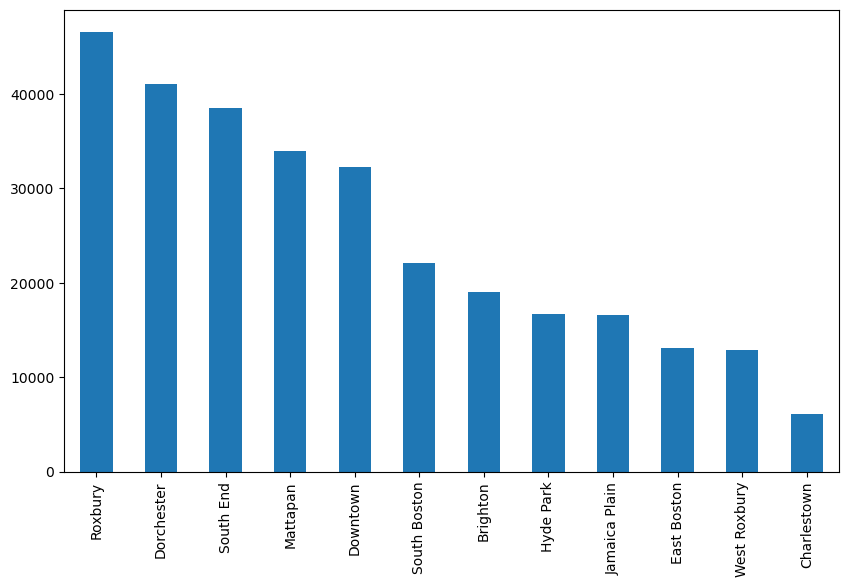

In [194]:
#24- Visualize Q4 (2)

plt.figure(figsize=(10, 6))
ucr_counts2.plot(kind='bar')
plt.xlabel('UCR Part')
plt.ylabel('Count of Crimes')
plt.title('Counts of Crimes by UCR Part')
plt.show()

### Marks [40/4] = [10] Total Marks